<a href="https://colab.research.google.com/github/MeenaCherukuri/AIML-Internship/blob/main/30_5_25_AIML_Internship_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [2]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
# Fit the model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

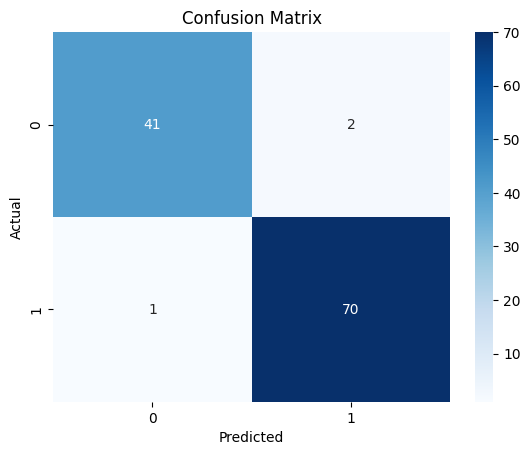

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 1.00


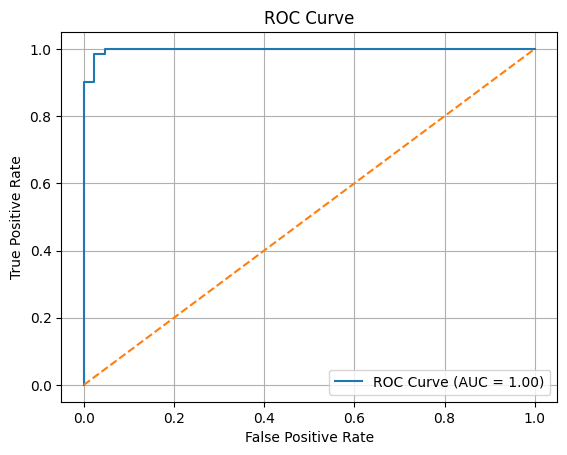

In [4]:
# Predictions and probabilities
y_pred = log_reg.predict(X_test_scaled)
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_score = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_score:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [5]:
# Tune threshold
custom_threshold = 0.3
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# Evaluate at new threshold
print("Custom Threshold Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))


Custom Threshold Confusion Matrix:
[[41  2]
 [ 0 71]]
Precision: 0.9726027397260274
Recall: 1.0
